In [ ]:
import fastf1 as ff1
import pandas as pd
import matplotlib as matplotlib
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
from matplotlib.patches import Rectangle
import statistics
ff1.Cache.enable_cache('2023Spain') 
fp = ff1.get_session(2023, 'Spain', 'R')
fp.load()

Text(0.5, 0, 'LAP')

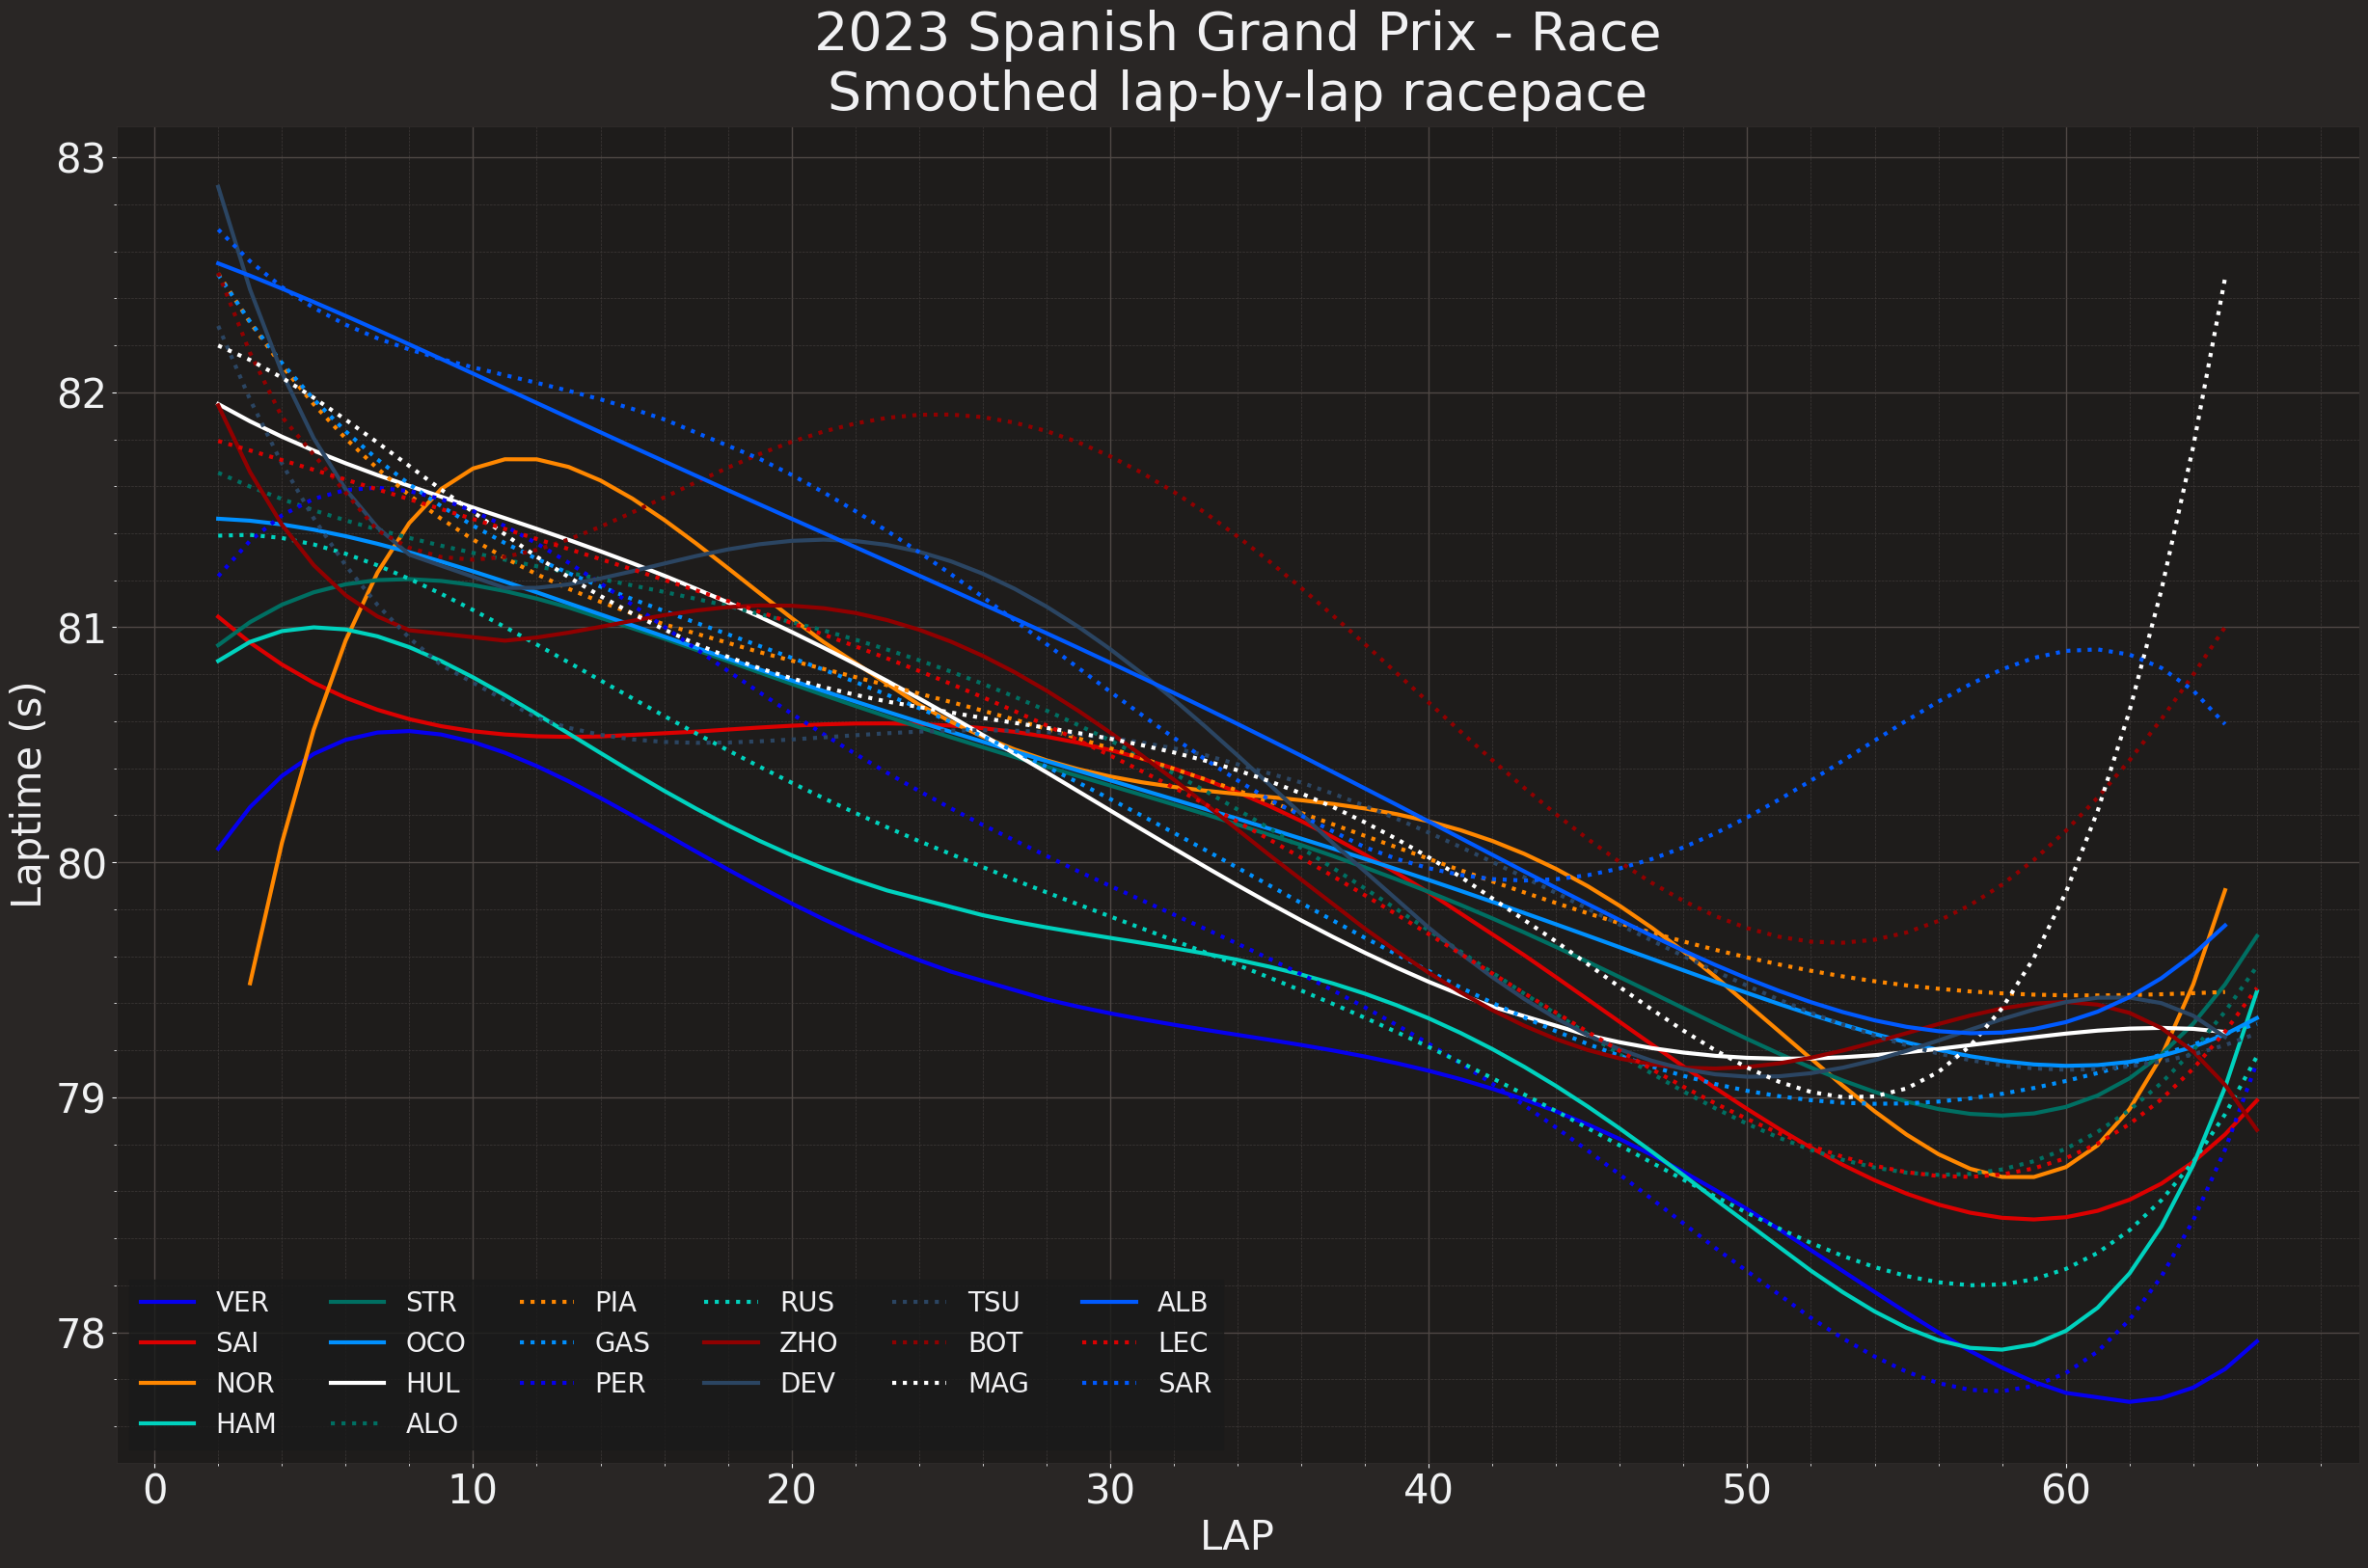

In [2]:
laps=fp.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

laptime_max = q75 + (1.5 * intr_qr) # IQR proximity rule: Max = q75 + 1,5 * IQR
laptime_min = q25 - (1.5 * intr_qr) # IQR proximity rule: Min = q25 + 1,5 * IQR

laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

drivers_to_visualize = pd.unique(fp.laps['Driver'])

ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)


##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels

    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("LAP", fontsize=30)

Text(0.5, 0, 'LAP')

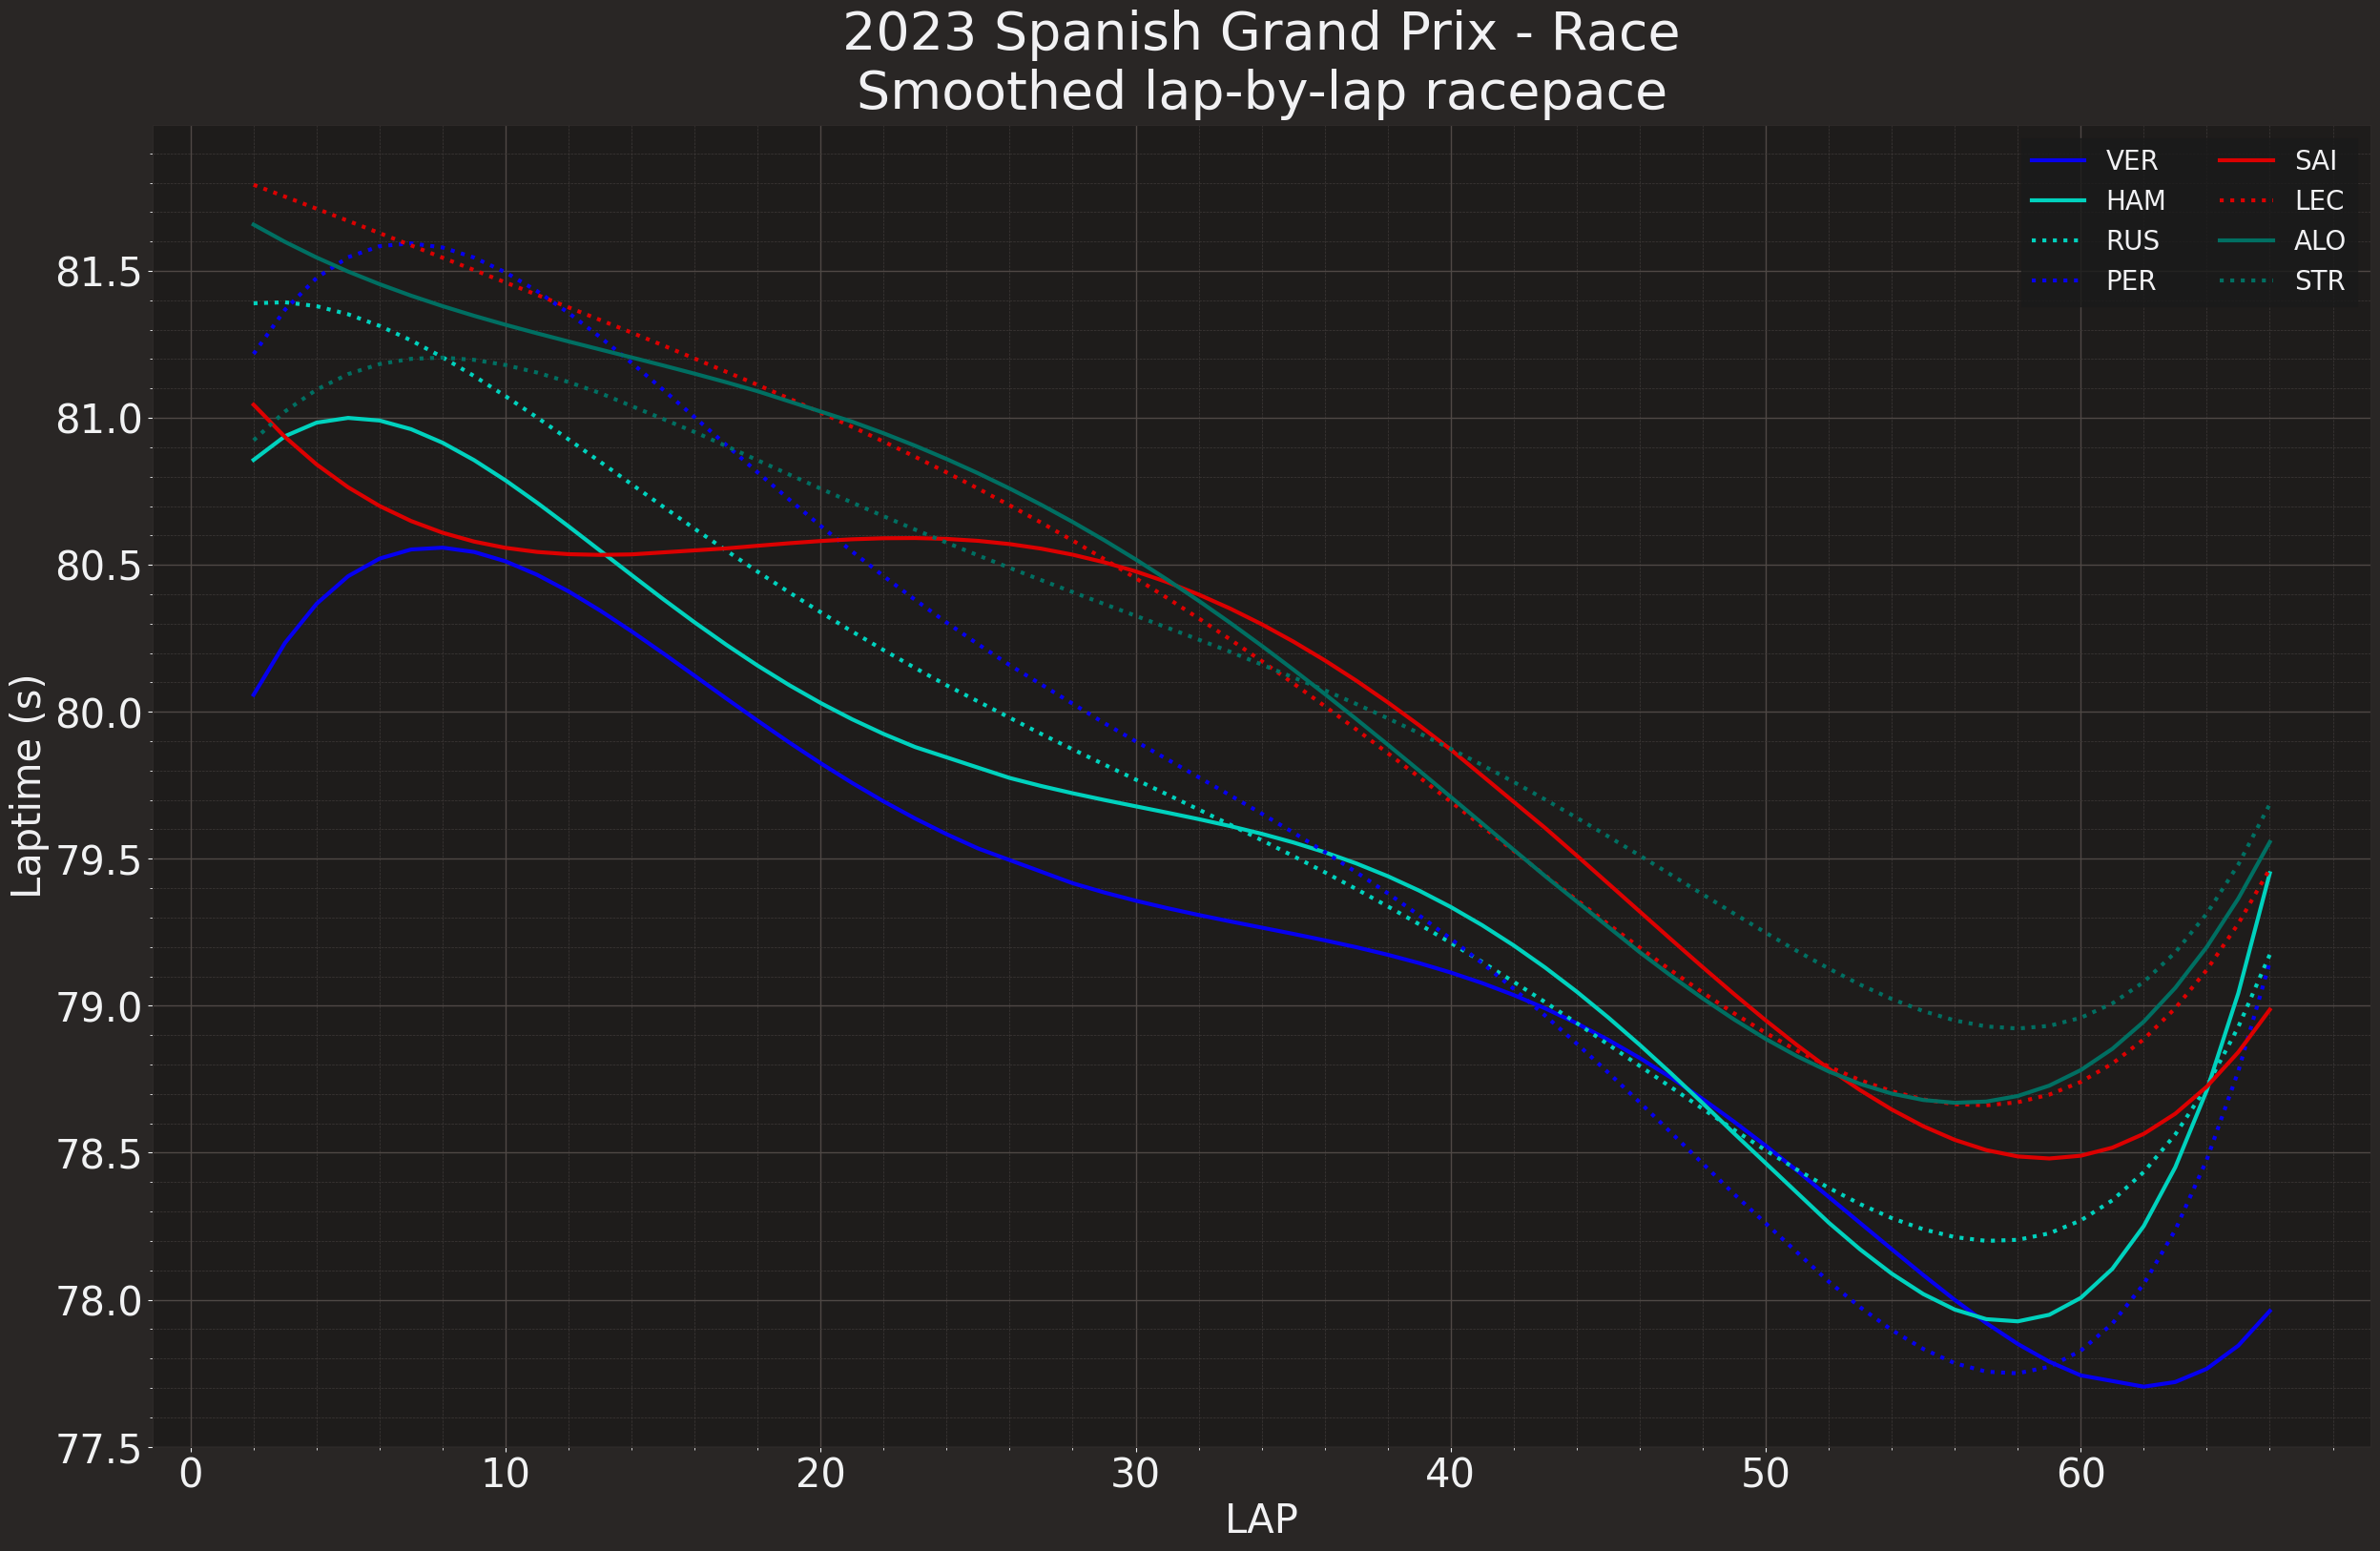

In [4]:
ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []
drivers_to_visualize = ["VER", "HAM", "RUS", "PER", "SAI", "LEC", "ALO", "STR"]
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)



##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels

    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("LAP", fontsize=30)

Text(0.5, 0, 'LAP')

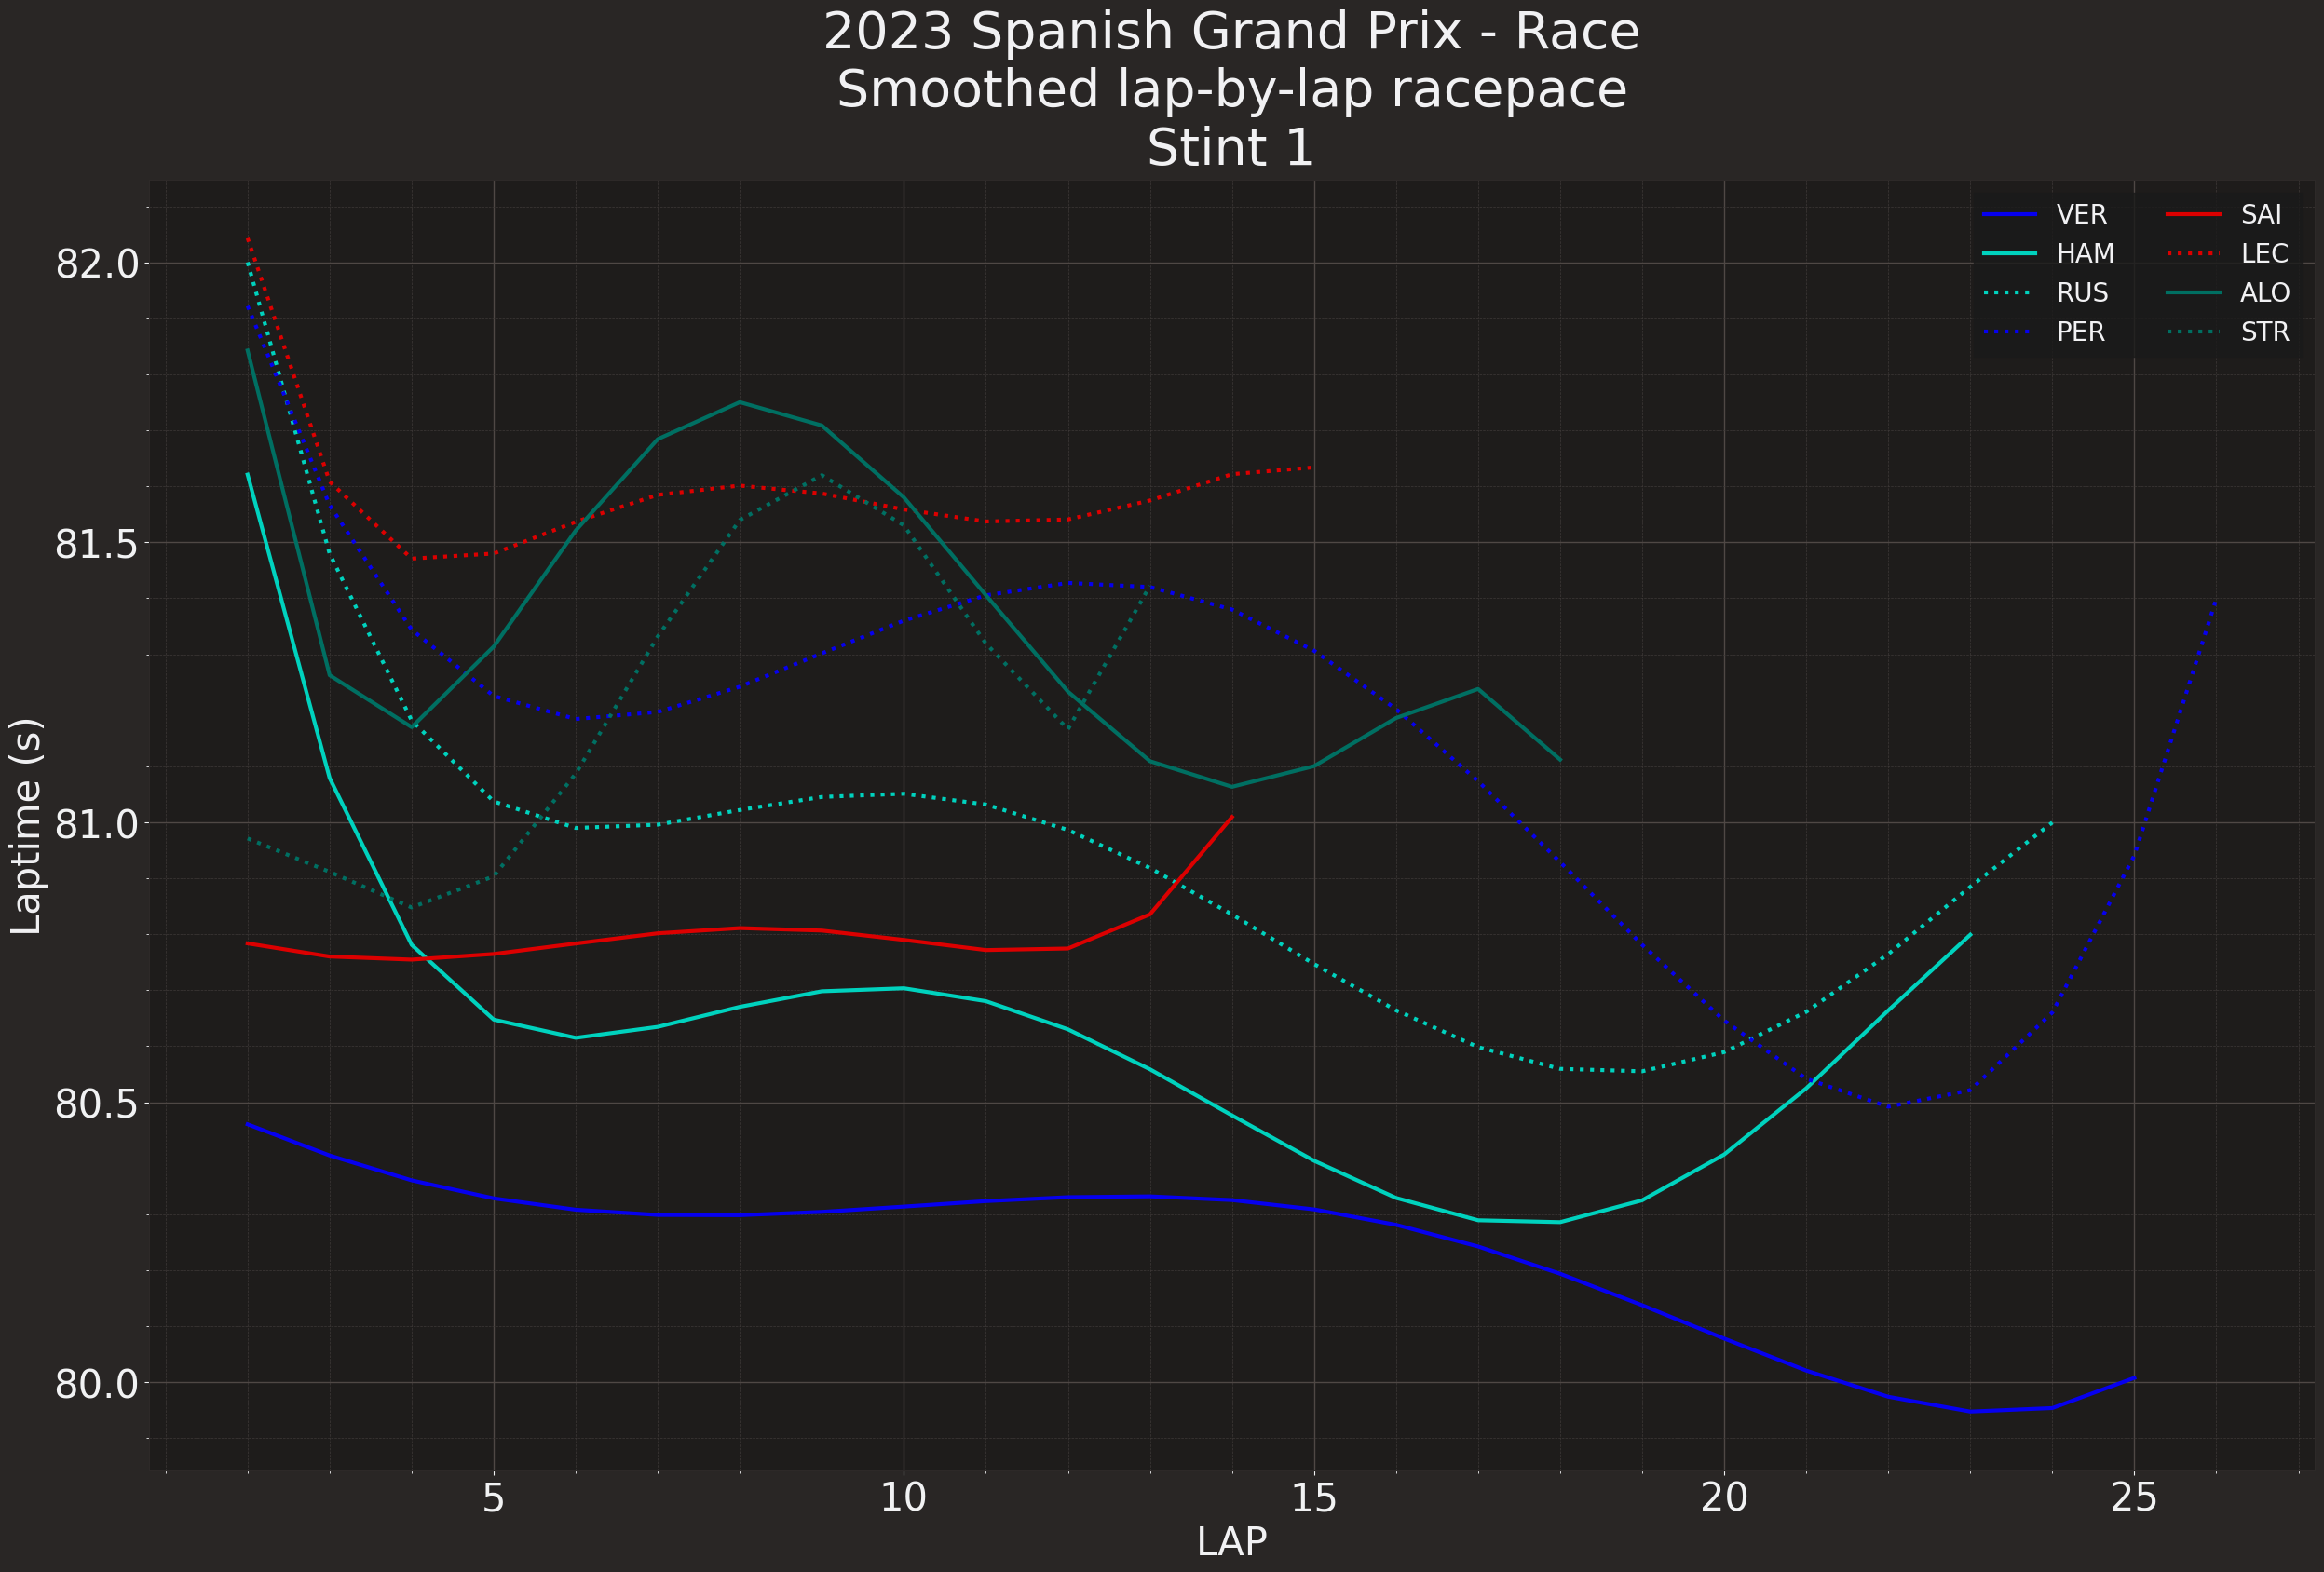

In [11]:
ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
laps=fp.laps.loc[(fp.laps['Stint']==1) & (fp.laps['IsAccurate'] == True)]
visualized_teams = []
team_colors = []
drivers_to_visualize = ["VER", "HAM", "RUS", "PER", "SAI", "LEC", "ALO", "STR"]
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)



##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels

    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace\nStint 1", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("LAP", fontsize=30)

Text(0.5, 0, 'LAP')

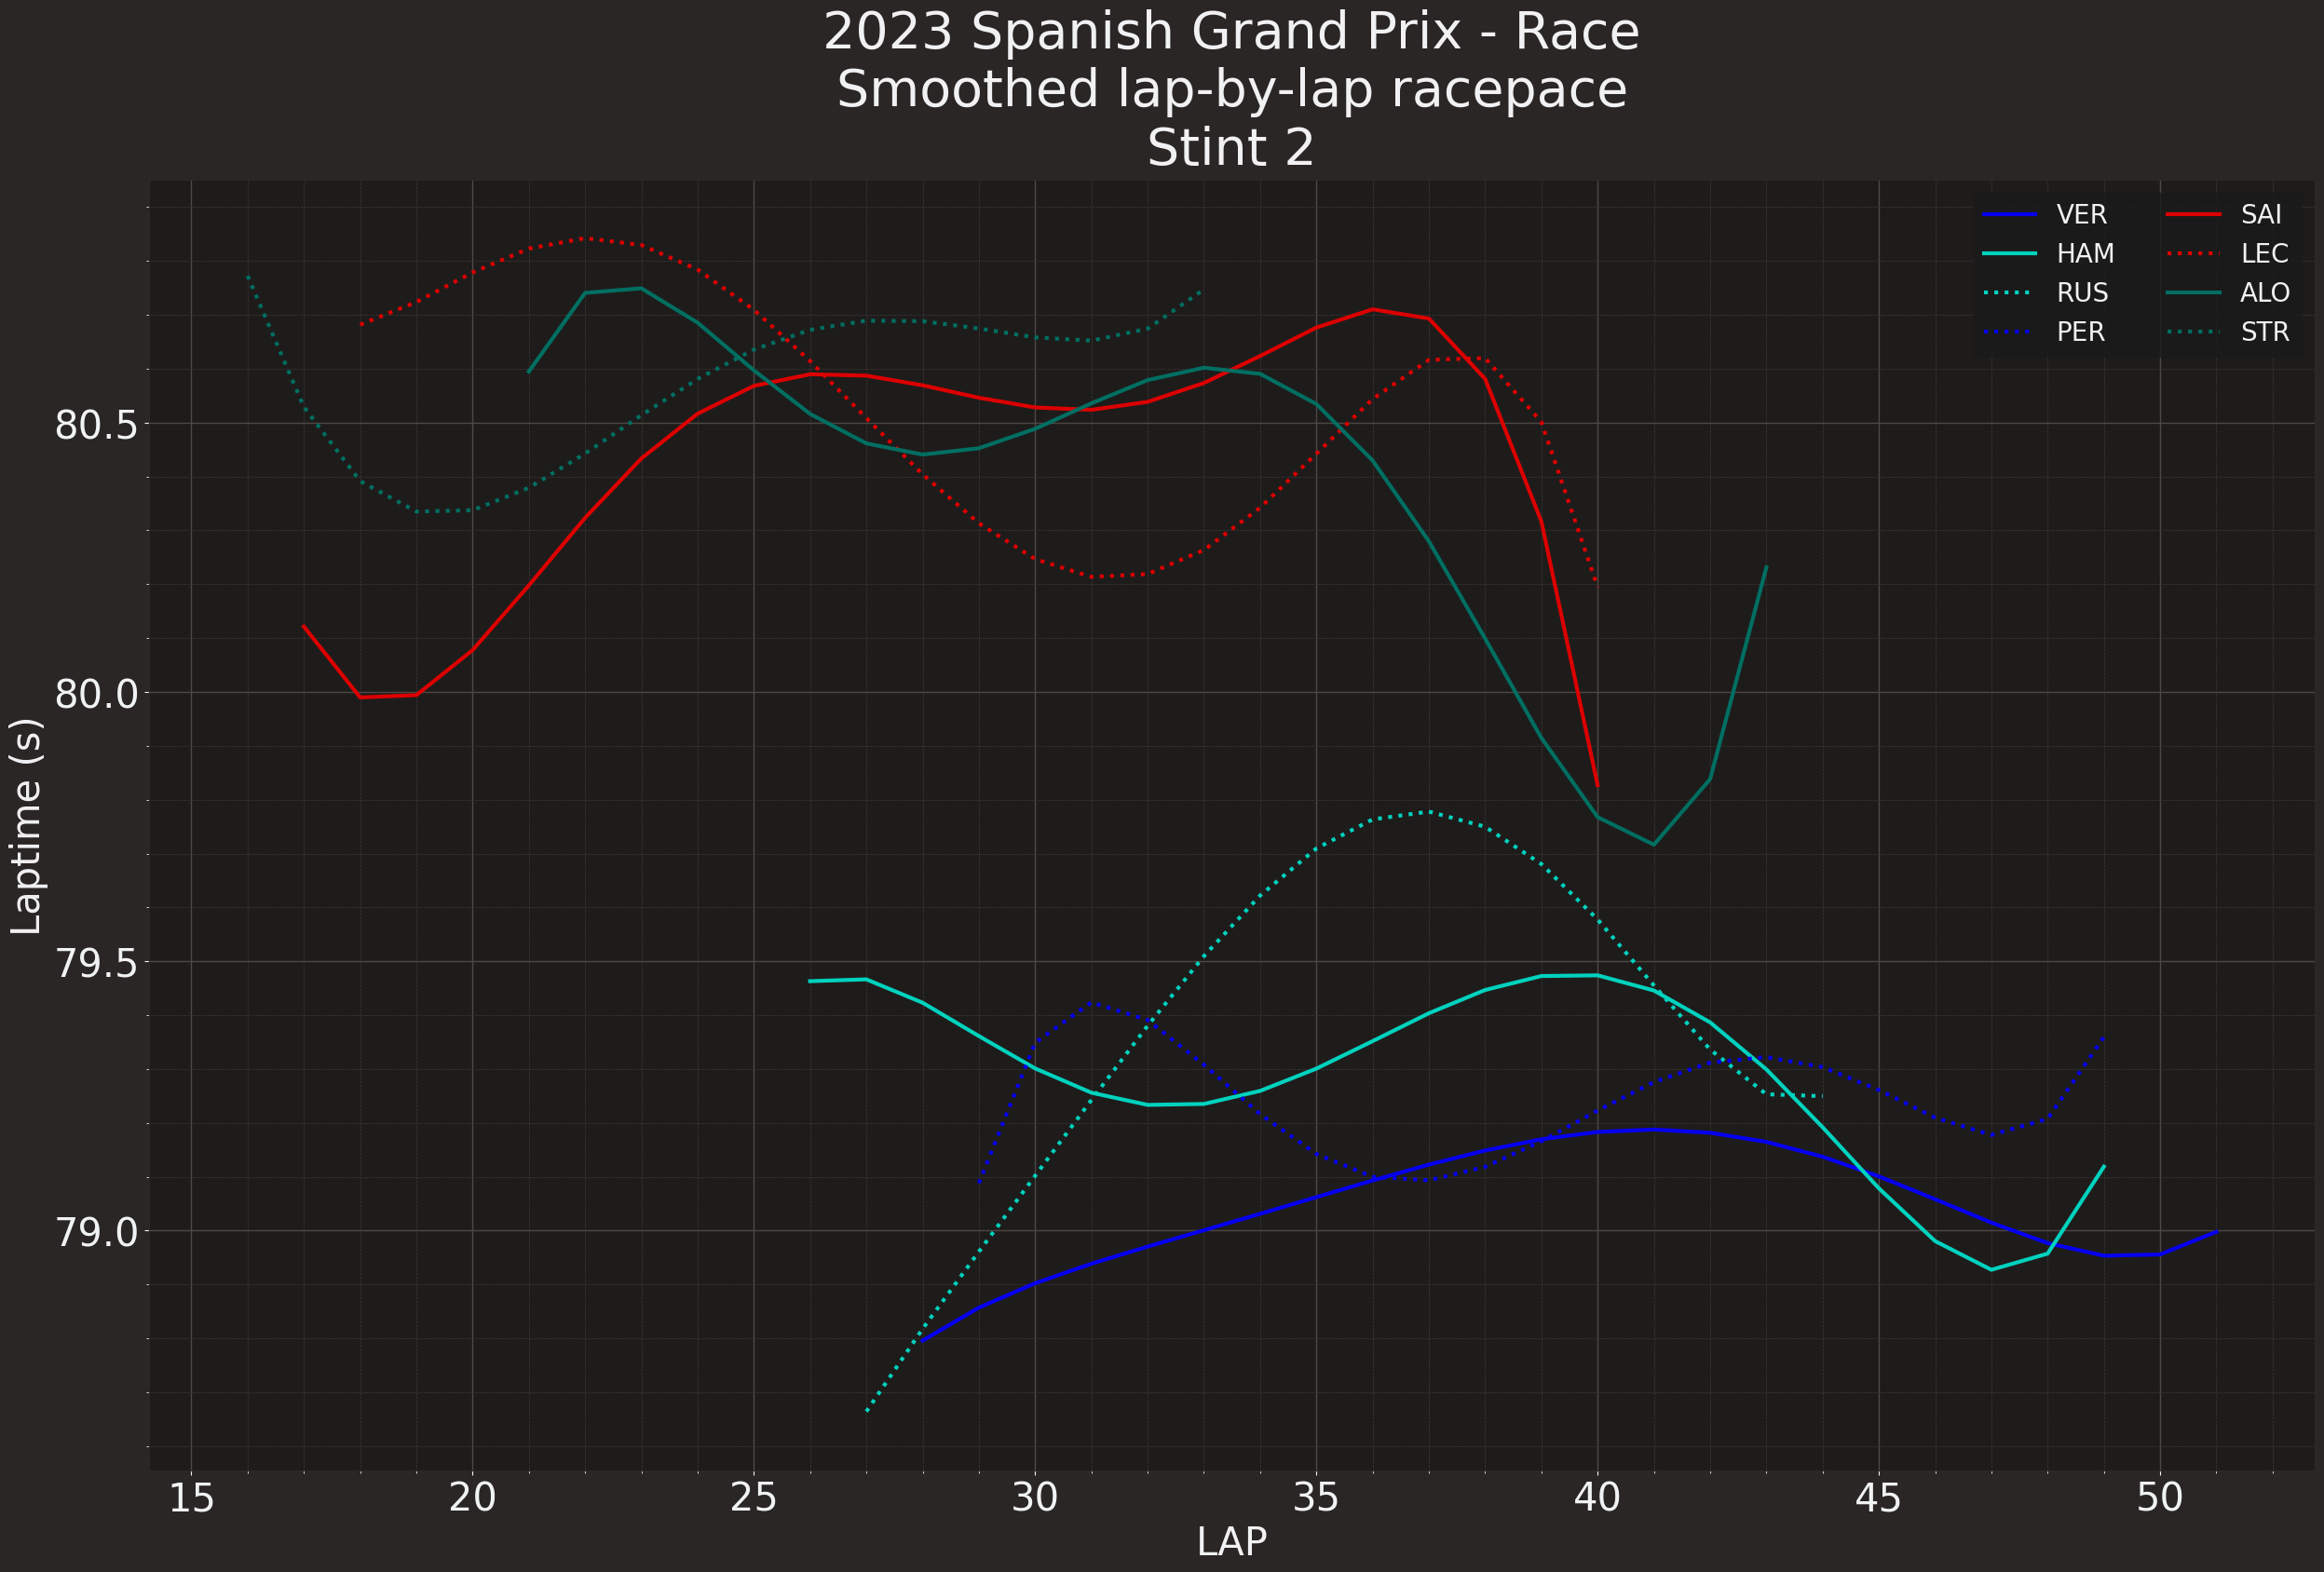

In [12]:
ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
laps=fp.laps.loc[(fp.laps['Stint']==2) & (fp.laps['IsAccurate'] == True)]
visualized_teams = []
team_colors = []
drivers_to_visualize = ["VER", "HAM", "RUS", "PER", "SAI", "LEC", "ALO", "STR"]
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)



##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels

    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace\nStint 2", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("LAP", fontsize=30)

Text(0.5, 0, 'LAP')

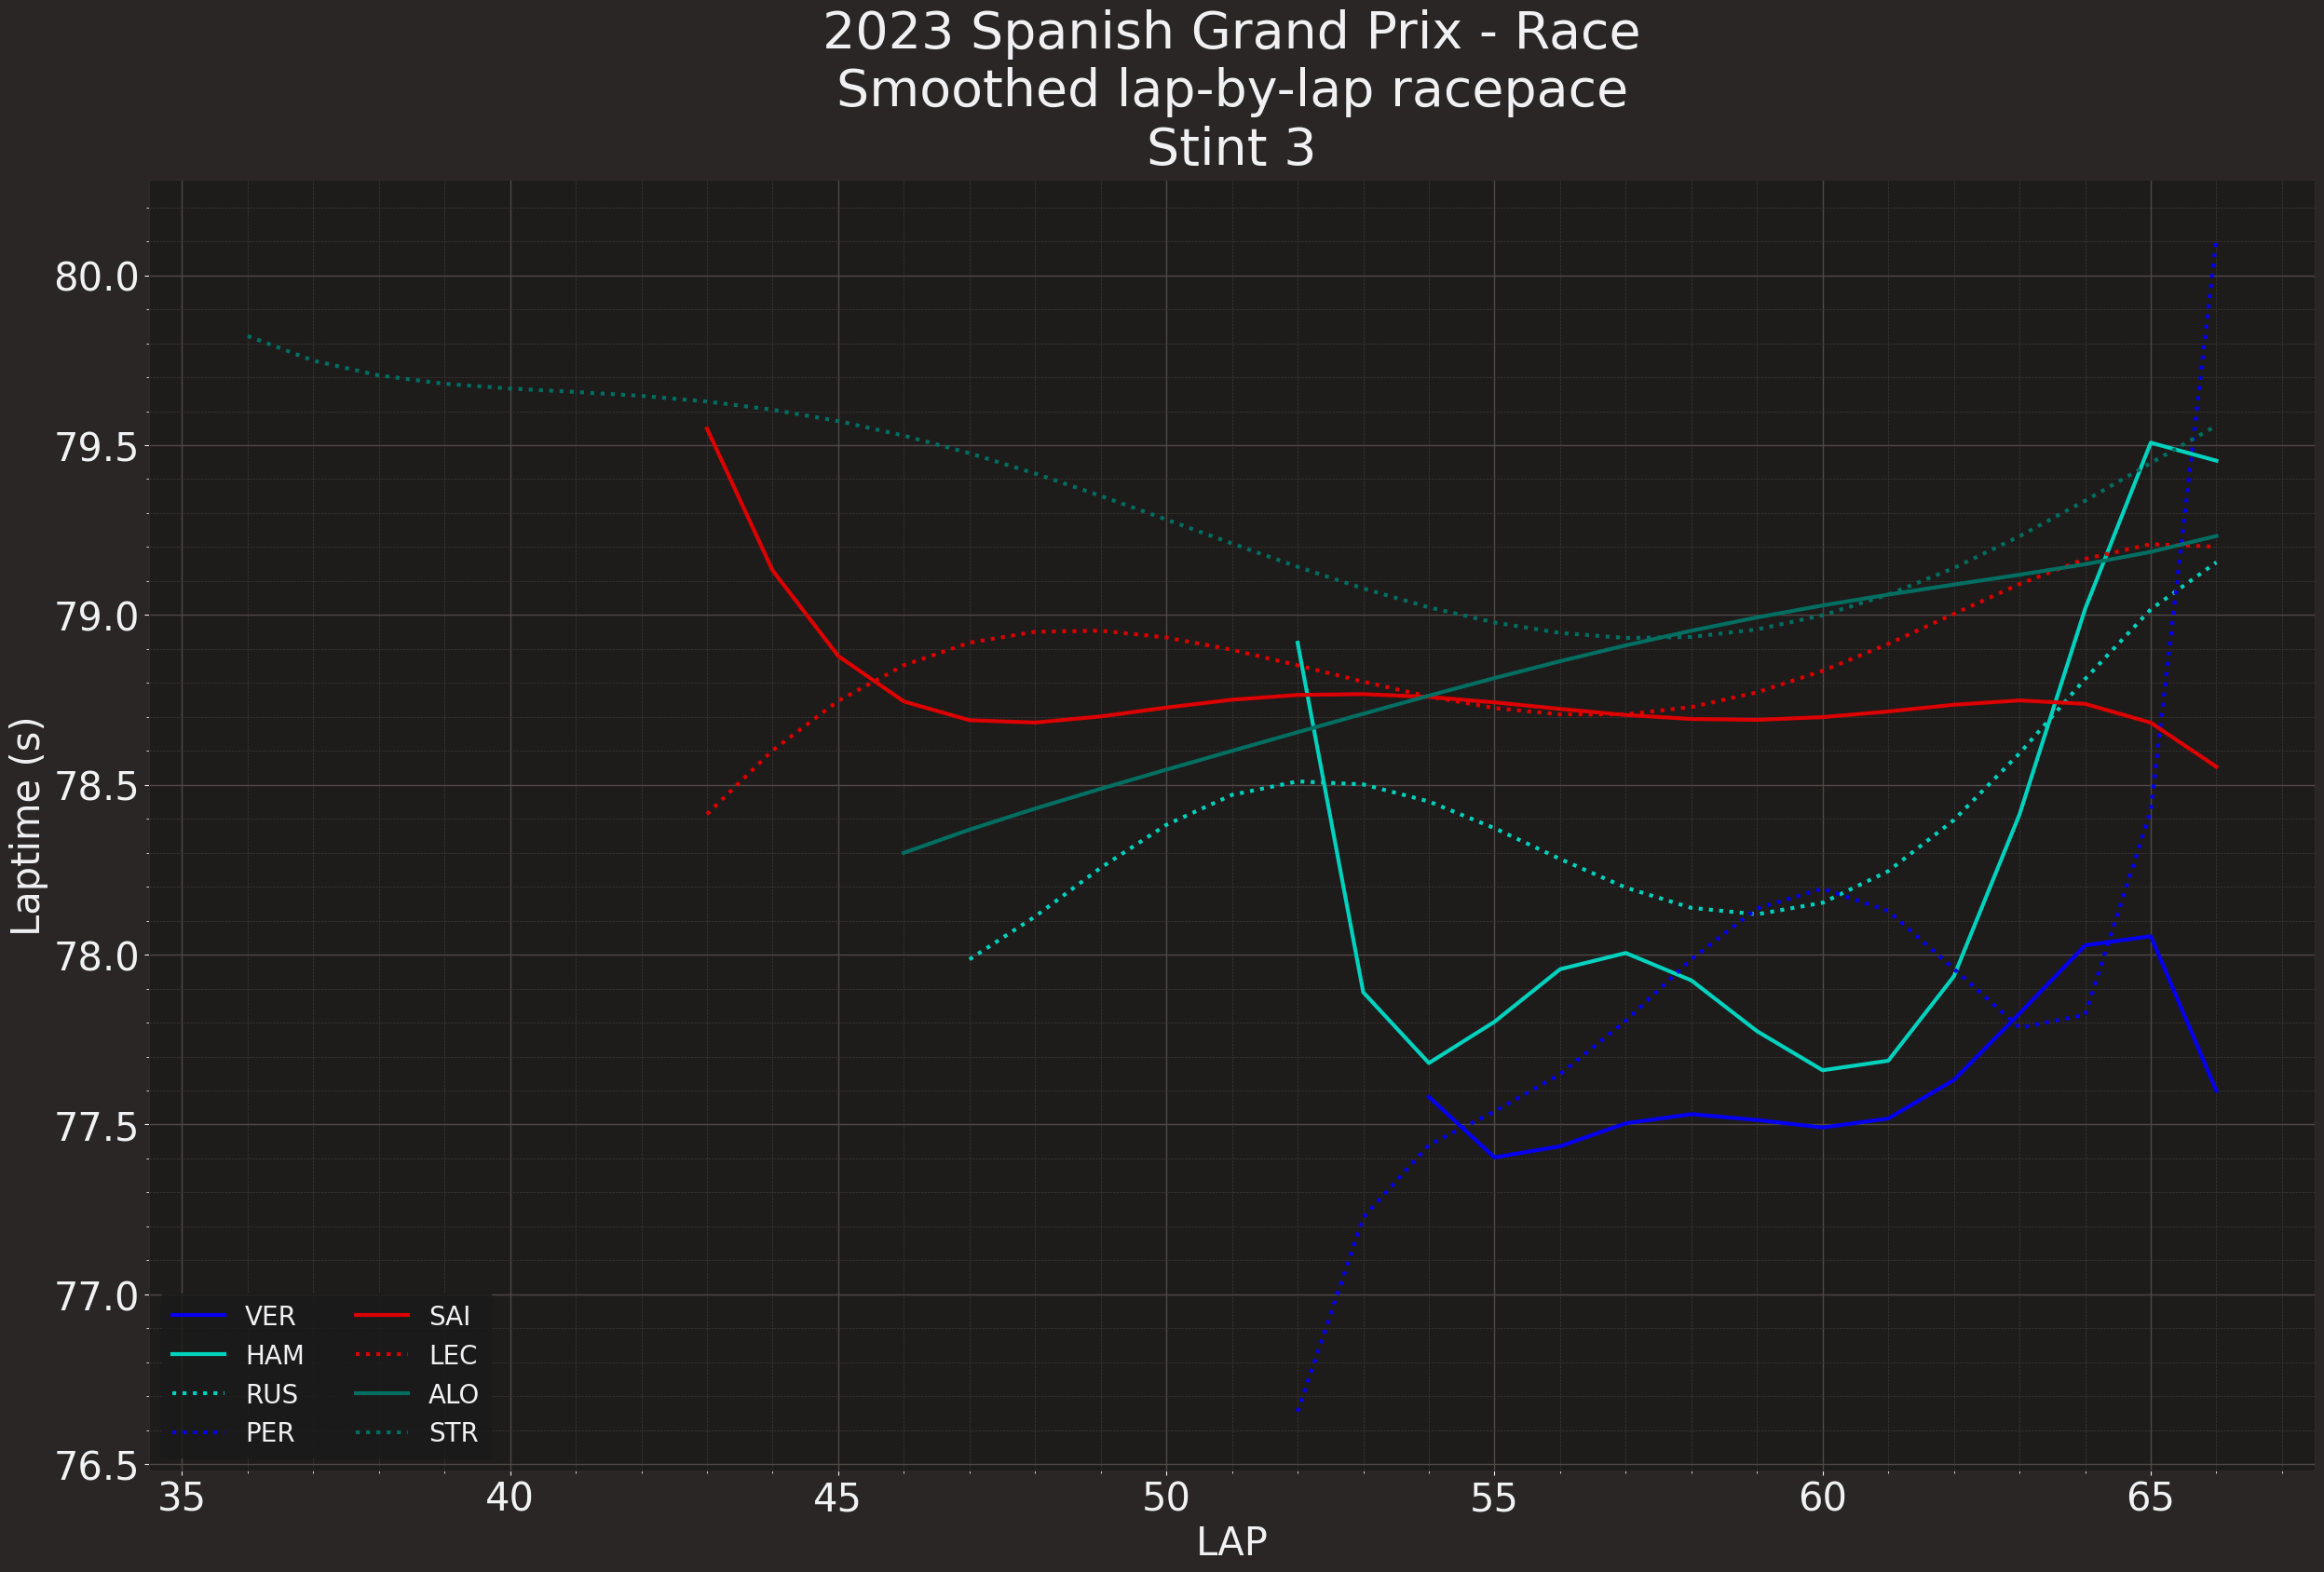

In [13]:
ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
laps=fp.laps.loc[(fp.laps['Stint']==3) & (fp.laps['IsAccurate'] == True)]
visualized_teams = []
team_colors = []
drivers_to_visualize = ["VER", "HAM", "RUS", "PER", "SAI", "LEC", "ALO", "STR"]
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)



##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels

    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace\nStint 3", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("LAP", fontsize=30)

(190.0, 230.0)

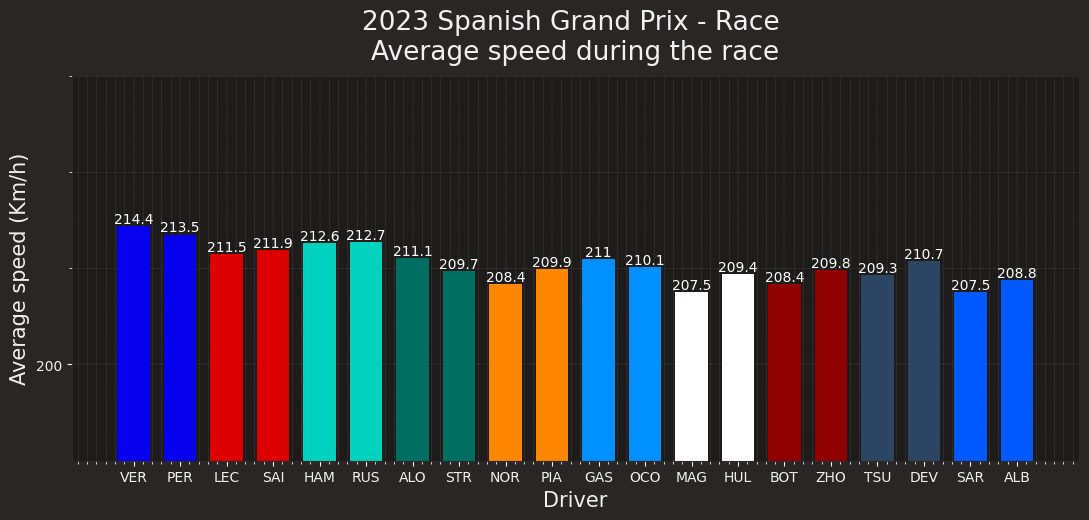

In [18]:
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate'] == True)]

#creo un dizionario con le velocità medie
mean_speed_dict = dict.fromkeys(drivers)
for driver in drivers:
        mean_speed = np.mean(fp_laps.pick_driver(driver).get_car_data()["Speed"]) #mean speed
        #mean_speed = sum(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"]) / len(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"])
        mean_speed_dict[driver] = float("{:.1f}".format(mean_speed))#(mean_speed)

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'MAG', 'HUL', 'BOT', 'ZHO', 'TSU', 'DEV', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

mean_speed_dict_ordered = OrderedDict((k, mean_speed_dict[k]) for k in team_color_drvrs)
mean_speed_dict_ordered = dict(mean_speed_dict_ordered)

ff1.plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(13, 5))
plt.bar_label(plt.bar(list(mean_speed_dict_ordered.keys()), list(mean_speed_dict_ordered.values()), color = team_colors, width=0.7), fontsize = 10, color = 'white')
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \nAverage speed during the race")

plt.xlabel("Driver", fontsize=15)
plt.ylabel("Average speed (Km/h)", fontsize=15)
plt.yticks(range(0, 350, 50))
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.3)
ax = plt.gca()
ax.set_ylim([190, 230])

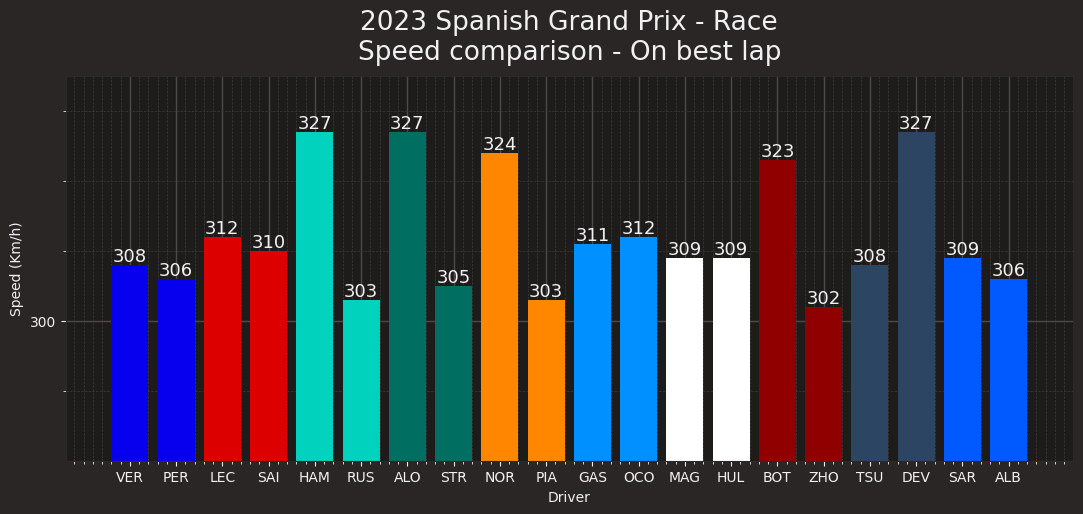

In [26]:
from collections import OrderedDict

#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        max_speed_dict[driver] = max(fp_laps.pick_driver(driver).pick_fastest().get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'MAG', 'HUL', 'BOT', 'ZHO', 'TSU', 'DEV', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)
fig, ax = plt.subplots(figsize=(13, 5))
ff1.plotting.setup_mpl()
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))
plt.yticks(range(0, 450, 50))
plt.title(f"{fp.event.year} {fp.event['EventName']} - {fp.name}\n"f"Speed comparison - On best lap")
ax.set_ylim([280, 335])
plt.xlabel('Driver', fontsize=10)
plt.ylabel('Speed (Km/h)', fontsize=10)
plt.show()

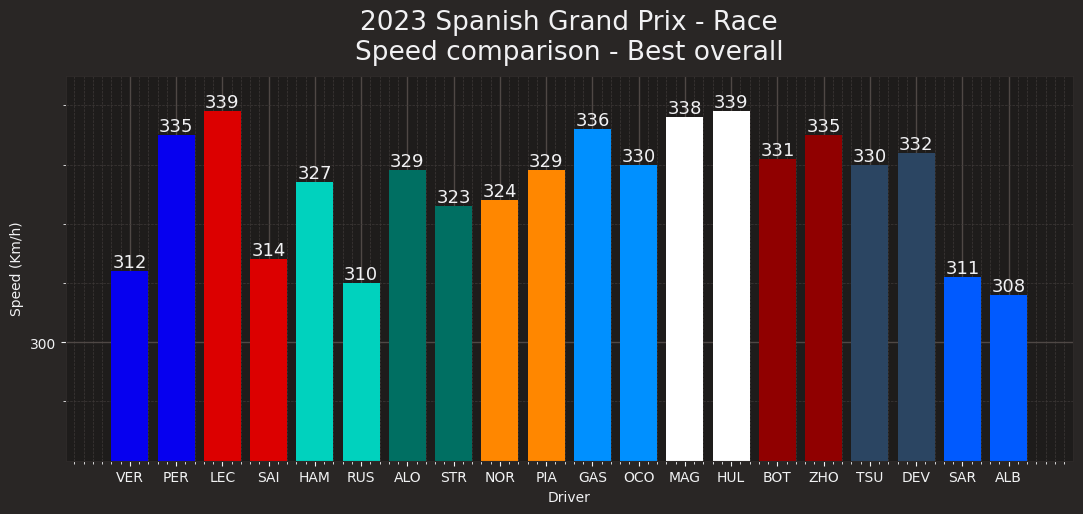

In [29]:
from collections import OrderedDict

#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        max_speed_dict[driver] = max(fp_laps.pick_driver(driver).get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'MAG', 'HUL', 'BOT', 'ZHO', 'TSU', 'DEV', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)
fig, ax = plt.subplots(figsize=(13, 5))
ff1.plotting.setup_mpl()
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))
plt.yticks(range(0, 450, 50))
plt.title(f"{fp.event.year} {fp.event['EventName']} - {fp.name}\n"f"Speed comparison - Best overall")
ax.set_ylim([280, 345])
plt.xlabel('Driver', fontsize=10)
plt.ylabel('Speed (Km/h)', fontsize=10)
plt.show()